<a href="https://colab.research.google.com/github/ucfilho/ANN_raianars/blob/master/ANN_parte_004_ANN_SET_20_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
imput_ANN.zip		 X_DAT_set_17_2019.csv	  Y_DAT_set_17_2019.csv
X_DAT_B_set_17_2019.csv  Y_DAT_B_set_17_2019.csv
Hello world
I'm evolving!!!



In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# leitura dos dados
DAT=pd.read_csv("X_DAT_B_set_17_2019.csv")
DAT_Y=pd.read_csv("Y_DAT_B_set_17_2019.csv")

In [0]:
DAT_OLD=[]
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)

DAT_OLD_Y=[]
DAT_OLD_Y=DAT.copy()
DAT_Y=Normatiza(DAT_Y)
#print(DAT_Y)

In [0]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
train=DAT.sample(frac=0.9,random_state=78) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
x_train=train.iloc[:,[1,2,3,4,5,6]]
x_test=test.iloc[:,[1,2,3,4,5,6]]
X_OLD=DAT_OLD.iloc[:,[1,2,3,4,5,6]]
#print(x_train)

In [0]:
# obtem as variaveis dependentes (treino e teste)
train=DAT_Y.sample(frac=0.9,random_state=78) # poderia ser frac=0.5? sim ou nao?
test=DAT_Y.drop(train.index)
Index=[3]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
#print(y_train)

In [8]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                   hidden_layer_sizes=(5),random_state=1)
# treina a rede neural
clf.fit(x_train, y_train)

# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#print(y_calc_test)


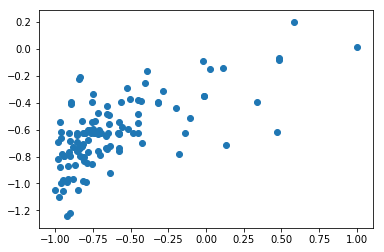

In [9]:
plt.scatter(y_train,y_calc_train)

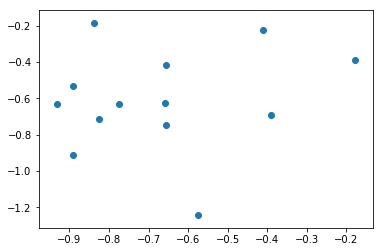

In [10]:
plt.scatter(y_test,y_calc_test)

In [11]:
#print(max(y_calc_test))
#print(y_calc_test.index(max(y_calc_test)))
#item=max(y_calc_test)
#item_index = np.where(y_calc_test==item)
#print(item_index)


-0.18357579996840068
(array([4]),)


In [0]:
#print(y_calc_test[17])
#print(x_test.iloc[17,:])
#print(y_test[17])

In [13]:
print(x_test)

     DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X  DELTA FOBJ  DELTA VX
3      -0.948084 -0.243884         0.0      1.0         0.5       0.0
12     -0.999895 -0.339206         1.0     -1.0         0.0      -1.0
20     -0.263131 -0.476377         1.0     -1.0         0.5      -1.0
29     -0.999962 -0.554429         1.0      0.0         0.0       0.0
40     -0.912613 -0.185760         0.0     -1.0        -0.5      -0.5
43     -1.000000  0.621325         1.0      0.0         0.0       0.0
54      0.160038 -0.801636        -1.0     -1.0         0.0       0.0
68      0.441227  0.023339        -1.0      1.0         0.0       1.0
78     -0.093291  0.331073        -1.0     -1.0        -0.5       0.0
105    -0.051790  0.531853         0.0      1.0         0.0       1.0
115     0.073098  0.891151         0.0     -1.0         0.0      -1.0
116     0.089921  1.000000         0.0     -1.0         0.0       0.0
120     0.567726 -0.152356         0.0      1.0         0.0       1.0


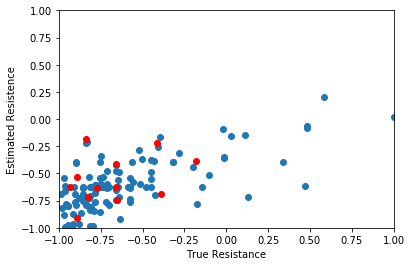

In [17]:
plt.scatter(y_train,y_calc_train)
plt.scatter(y_test,y_calc_test,color='r')
plt.xlabel("True Resistance")
plt.ylabel("Estimated Resistence")
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

In [15]:
mse=mean_squared_error(y_train,y_calc_train)
print("MSE train=",mse)
R2=r2_score(y_train,y_calc_train)
print("R^2 train=",R2)

MSE train= 0.07694915228615617
R^2 train= 0.44659053546667093


In [16]:
mse=mean_squared_error(y_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.1051421124281663
R^2 teste= -1.1858118984542085
